# Exploratory Data Analysis of Drug Review Dataset

The following Jupyter Notebook analyses the Drug Review Dataset using EDA techniques. It explores the different aspects of the data to retrieve useful notions such as:
  + What is the most popular drug in the market?
  + Which drugs are used for different types of medical conditions?
  + Which drugs have the most ratings?
  + Are the ratings of the drug genuine? (using Sentiment Analysis of the reviews)

> **Datasource**
    https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29
    
+ **Attributes**
    - drugName (categorical): Name of Drug
    - condition (categorical): Name of Condition
    - review (text): Patient Review
    - rating (numerical): 10 Pointer Patient Rating
    - date (date): Date of Review Entry
    - usefulCount (numerical): Number of users who found the review useful

In [1]:
# Importing the relevant libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from textblob import TextBlob

In [3]:
# Reading the dataset
df = pd.read_csv('Data/drugsComTrain_raw.tsv', sep='\t')

In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [6]:
# Finding Missing Values
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

### Conclusion
+ All of the missing values are in the condition column. 
+ This shows that most of the people either do not know their condition by name or they choose not to reveal the codition. 

In [8]:
#List of Drugs
drugList = df['drugName'].unique().tolist()

In [9]:
#Total Number of Drugs
len(drugList)

3436

## Most Popular Drugs

In [10]:
#Most Popular Drugs
pop_drugs = df['drugName'].value_counts().nlargest(20)
pop_drugs

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Citalopram                             995
Medroxyprogesterone                    995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

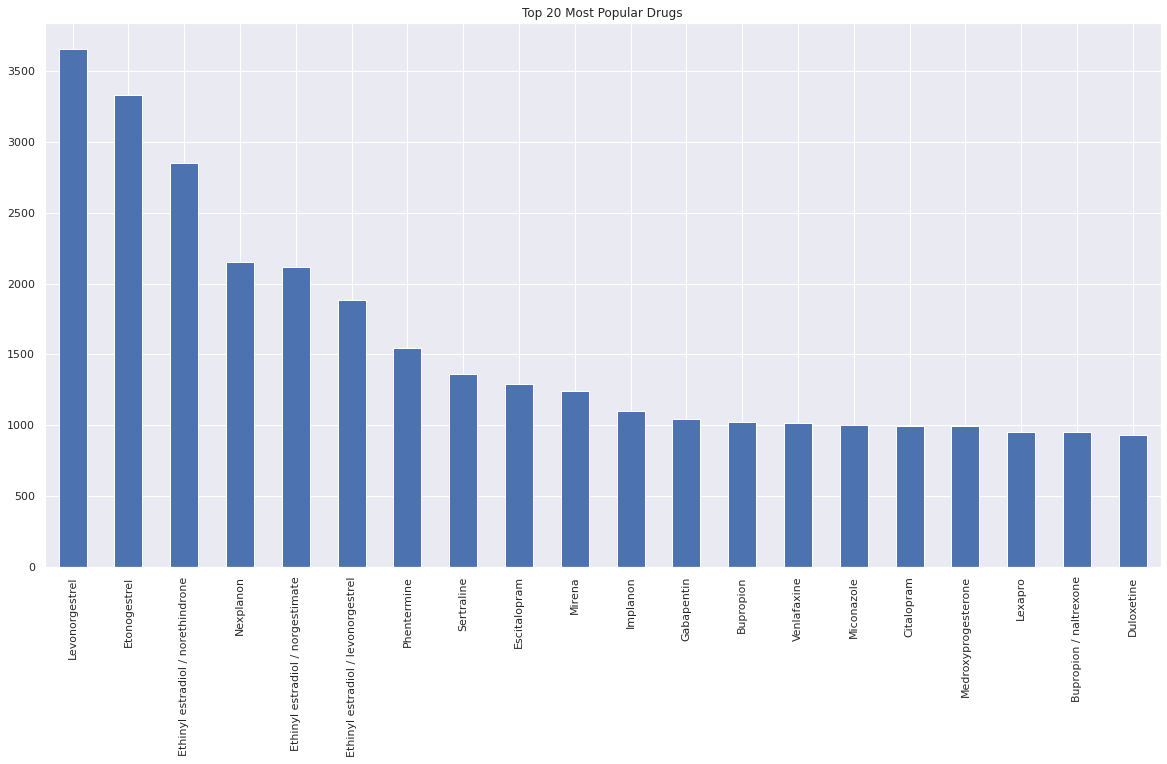

In [11]:
plt.figure(figsize=(20, 10))
pop_drugs.plot(kind='bar')
plt.title('Top 20 Most Popular Drugs')
plt.show()

## Least Popular Drugs

In [12]:
#Least Popular Drugs
least_pop = df['drugName'].value_counts().nsmallest(20)
least_pop

Topiragen                        1
Alimta                           1
Vanquish                         1
Lorabid                          1
Codimal DM                       1
Maxidex                          1
FluMist Quadrivalent             1
IncobotulinumtoxinA              1
Robitussin Cold Cough and Flu    1
Dehydroepiandrosterone           1
Alphagan P                       1
Diosmiplex                       1
Vanspar                          1
Prezcobix                        1
Feverall                         1
Micrainin                        1
Allegra ODT                      1
Ibudone                          1
Drixoral Cold / Flu              1
Lesinurad                        1
Name: drugName, dtype: int64

## Different types of conditions

In [13]:
# Different types of conditions
cond = df['condition'].unique().tolist()
cond

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 nan,
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 'S

In [14]:
#Total Number of Unique Conditions
len(cond)

885

In [15]:
#Top 20 Most Common Conditions
com_cond = df['condition'].value_counts().nlargest(20)
com_cond

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

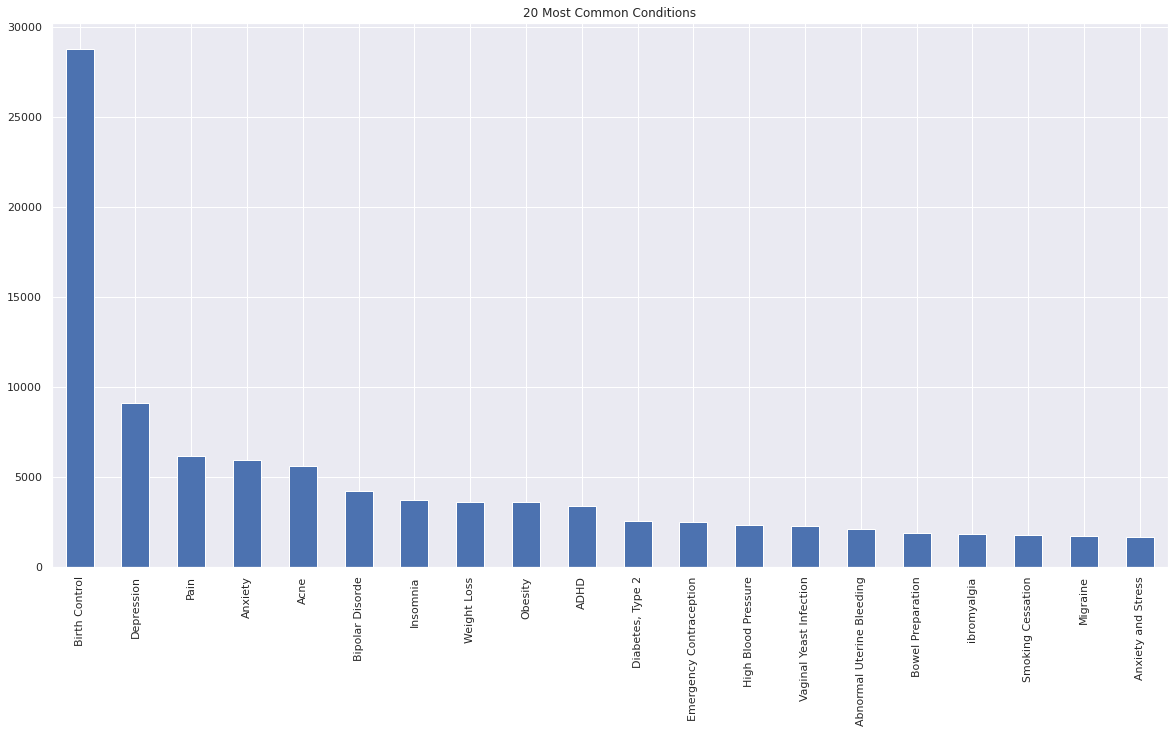

In [16]:
plt.figure(figsize=(20, 10))
com_cond.plot(kind = 'bar')
plt.title('20 Most Common Conditions')
plt.show()

In [17]:
#Least Common Conditions
leas_com = df['condition'].value_counts().nsmallest(20)
leas_com

Pruritus of Partial Biliary Obstruction         1
Parkinsonism                                    1
Infectious Diarrhea                             1
Meningitis, Meningococcal                       1
Neuritis                                        1
Neutropenia                                     1
Hyperbilirubinemia                              1
Gestational Diabetes                            1
Hypodermoclysis                                 1
Pemphigoid                                      1
Thyrotoxicosis                                  1
Bartonellosis                                   1
Myelofibrosis                                   1
Reversal of Nondepolarizing Muscle Relaxants    1
Stomach Cance                                   1
Secondary Cutaneous Bacterial Infections        1
Neurotic Depression                             1
Oppositional Defiant Disorde                    1
Joint Infection                                 1
Subarachnoid Hemorrhage                         1


condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

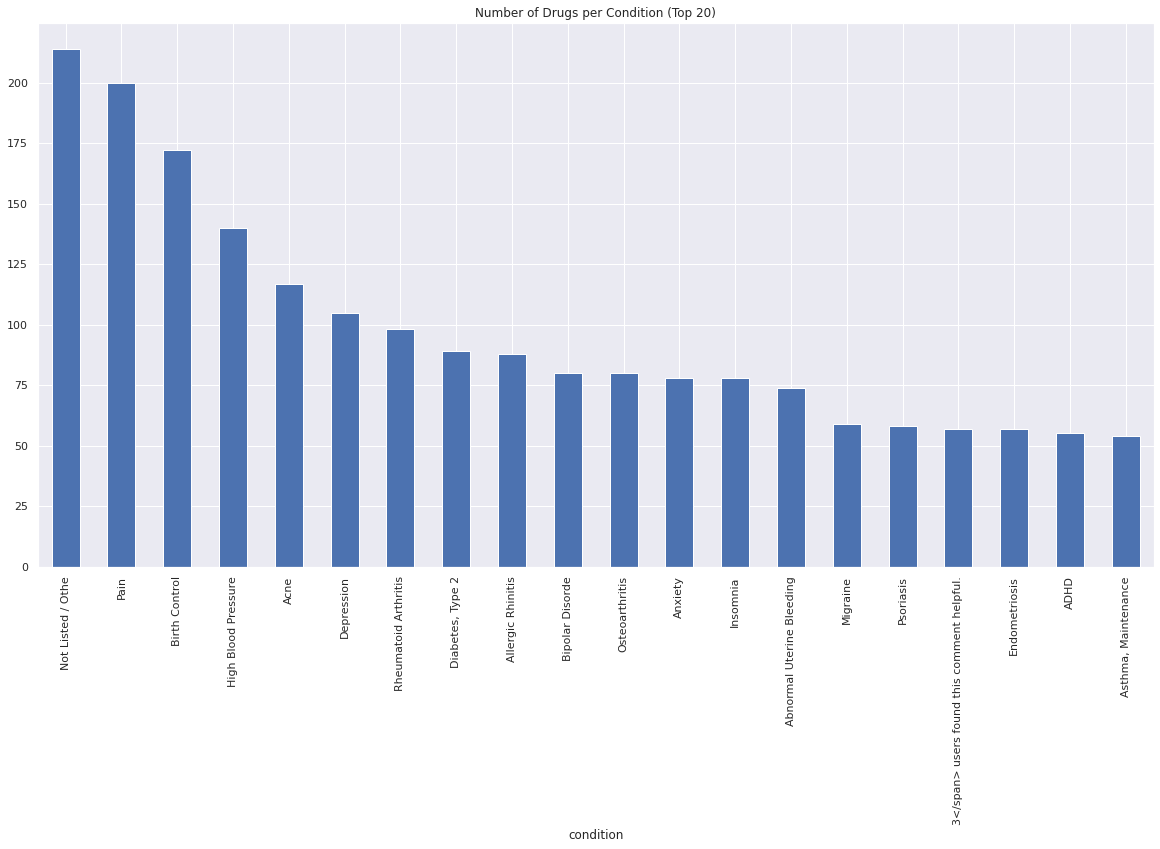

In [18]:
#Number of Drugs per Condition
plt.figure(figsize=(20, 10))
num_drg = df.groupby('condition')['drugName'].nunique().nlargest(20)
print(num_drg)
num_drg.plot(kind = 'bar')
plt.title('Number of Drugs per Condition (Top 20)')
plt.show()

## Drug Classes based on Suffix

The Drugs can be classified based on the suffix in their names. Generic names tend to follow patterns, with prefixes and suffixes often determining the class of medication.

The following library has been created using the information provided in the following blogpost:
https://mynursingmastery.com/blog/drug-names-stems-prefixes-roots-and-suffixes

In [19]:
drug_suffix = {'afil': 'phosphodiesterase (PDE) inhibitor',
 'asone': 'corticosteroid',
 'bicin': 'antineoplastic; cytotoxic agent',
 'bital': 'barbiturate (sedative)',
 'cef': 'cephalosporin antibiotic',
 'cort': 'corticosteroid',
 'cycline': 'tetracycline antibiotic',
 'dazole': 'anthelmintic; antibiotic; antibacterial',
 'dipine': 'calcium channel blocker',
 'dronate': 'bisphosphonate; bone resorption inhibitor',
 'eprazole': 'proton pump inhibitor (PPI)',
 'fenac': 'NSAID',
 'floxacin': 'quinolone antibiotic',
 'gliptin': 'antidiabetic; inhibitor of the DPP-4 enzyme',
 'glitazone': 'antidiabetic; thiazolidinedione',
 'iramine': 'antihistamine',
 'lamide': 'carbonic anhydrase inhibitor',
 'mab': 'monoclonal antibody',
 'mustine': 'alkylating agent (antineoplastic)',
 'mycin': 'antibiotic; antibacterial',
 'nacin': 'muscarinic antagonist (anticholinergic)nazole',
 'nazole': 'antifungal',
 'olol': 'beta blocker',
 'olone': 'corticosteroid',
 'onide': 'corticosteroid',
 'oprazole': 'proton pump inhibitor (PPI)',
 'phylline': 'xanthine derivative (bronchodilator)',
 'pramine': 'tricyclic antidepressant (TCA)',
 'profen': 'NSAID',
 'sartan': 'angiotensin II receptor antagonist; ARB',
 'ridone': 'atypical antipsychotic',
 'setron': 'antiemetic and antinauseant',
 'trel': 'female hormone (progestin)',
 'tadine': 'antiviral; anti-influenza-A',
 'tretin': 'retinoid; dermatologic agent; form of vitamin A',
 'zosin': 'alpha blocker',
 'azole': 'antifungal (except metronidazole)',
 'caine': 'anesthetic',
 'cillin': 'antibiotic(penicillins)',
 'micin': 'antibiotic',
 'oxacin': 'antibiotic',
 'ceph': 'antibiotic(cephalosporins)',
 'dine': 'h2 blockers (anti-ulcers)',
 'done': 'opiod analgesics',
 'ide': 'oral hypoglycemics',
 'lam': 'anti-anxiety',
 'pam': 'anti-anxiety',
 'mide': 'diuretics',
 'zide': 'diuretics',
 'nium': 'neuromuscular blocking agents',
 'tidine': 'h2 antagonist',
 'tropin': 'pituitary hormone',
 'ase': 'thrombolytics',
 'plase': 'thrombolytics',
 'azepam': 'anti-anziety(benzodiazepine)',
 'azine': 'antipyschotics (phenothiazine)',
 'barbital': 'barbiturate',
 'lol': 'beta blocker',
 'zolam': 'cns depressants',
 'pril': 'ace inhibitor',
 'artan': 'arb blocker',
 'statins': 'lipid-lowering drugs',
 'parin': 'anticoagulants',
 'sone': 'corticosteroid (prednisone)'}


In [20]:
# Classify Drugs based on the suffix 
def Classify_drug(drugname):
    for suffix in drug_suffix.keys():
        if drugname.endswith(suffix):
            return drug_suffix[suffix]
    

In [21]:
df['drugClass'] = df['drugName'].apply(Classify_drug)

In [22]:
df[['drugName', 'drugClass']]

,drugName,drugClass
0,Valsartan,angiotensin II receptor antagonist; ARB
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [23]:
# Number of Drugs by Class 
len(df['drugClass'].unique().tolist())

47

### Which Class of Drug is the most common?

In [24]:
com_class = df['drugClass'].value_counts()
com_class

female hormone (progestin)                         9695
opiod analgesics                                   3578
oral hypoglycemics                                 3350
anti-anxiety                                       2645
antifungal                                         2083
antibiotic; antibacterial                          1590
beta blocker                                       1063
monoclonal antibody                                1052
h2 blockers (anti-ulcers)                          1013
tetracycline antibiotic                             972
anthelmintic; antibiotic; antibacterial             968
corticosteroid                                      951
quinolone antibiotic                                834
NSAID                                               682
antipyschotics (phenothiazine)                      664
antifungal (except metronidazole)                   622
phosphodiesterase (PDE) inhibitor                   603
angiotensin II receptor antagonist; ARB         

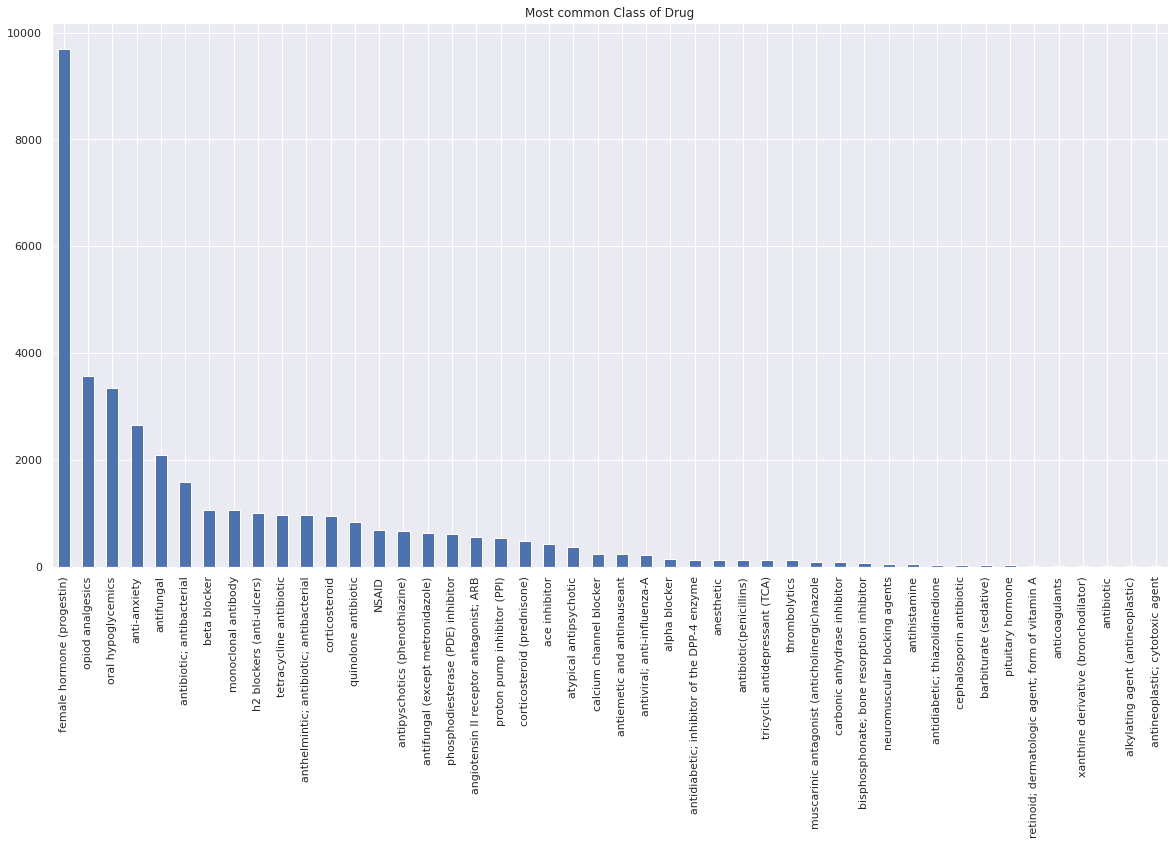

In [25]:
plt.figure(figsize=(20,10))
com_class.plot(kind = 'bar')
plt.title('Most common Class of Drug')
plt.show()

## Analysis on Rating

In [26]:
# Average rating of Drugs
avg = (df['rating'].groupby(df['drugName']).mean())
avg

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

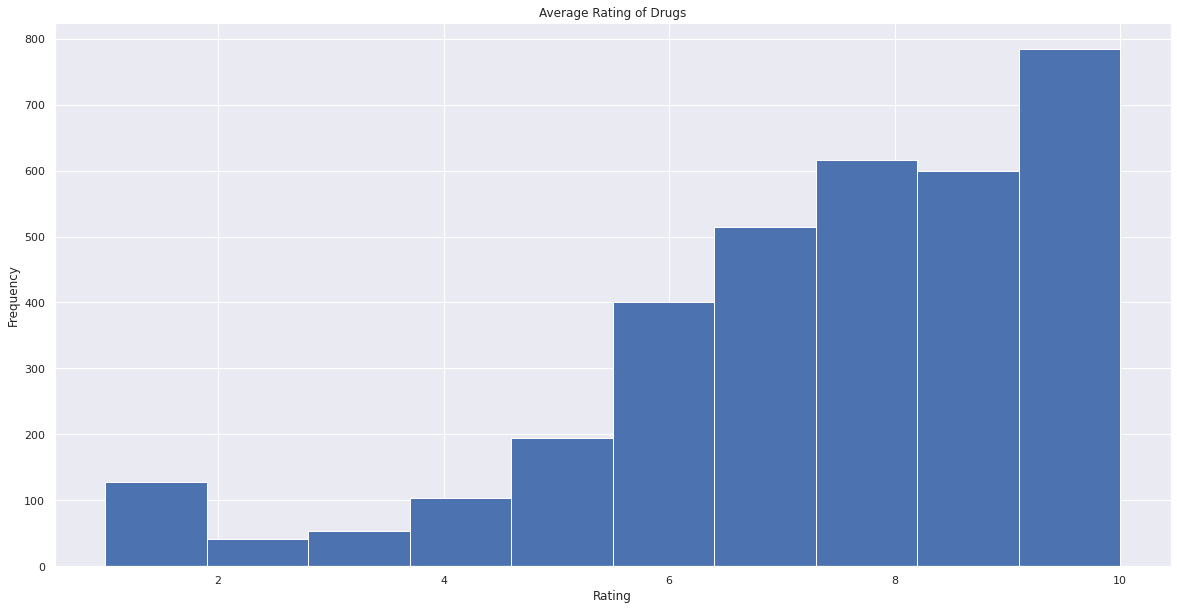

In [27]:
plt.figure(figsize=(20,10))
avg.plot(kind='hist')
plt.title('Average Rating of Drugs')
plt.xlabel('Rating')
plt.show()

### Conclusion
+ This shows that most of the Drugs are rated above 5. 

In [28]:
# Which Drugs have the highest rating?
avg.nlargest(20)

drugName
A + D Cracked Skin Relief                              10.0
A / B Otic                                             10.0
Absorbine Jr.                                          10.0
Accolate                                               10.0
Acetaminophen / caffeine / magnesium salicylate        10.0
Acetaminophen / dextromethorphan / doxylamine          10.0
Acetaminophen / phenylephrine                          10.0
Acetaminophen / pseudoephedrine                        10.0
Acetic acid / antipyrine / benzocaine / polycosanol    10.0
Acrivastine / pseudoephedrine                          10.0
Acyclovir / hydrocortisone                             10.0
Advil Cold and Sinus Liqui-Gels                        10.0
Aerobid-M                                              10.0
Afrin 4 Hour Extra Moisturizing                        10.0
Ala-Quin                                               10.0
Alavert                                                10.0
Aldactazide                    

In [29]:
# Which Drugs have the lowest rating?
avg.nsmallest(20)

drugName
Acarbose                                                                                            1.0
Adempas                                                                                             1.0
Aller-Ease                                                                                          1.0
Alogliptin / metformin                                                                              1.0
Amethyst                                                                                            1.0
Amikin                                                                                              1.0
Anusol-HC Suppositories                                                                             1.0
Aquavite-E                                                                                          1.0
Aquoral                                                                                             1.0
Atovaquone                                             

## Analysis on Review

In [30]:
# How many reviews are positive, negative or neutral?
# Using Sentiment Analysis 
def Sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def SentimentLabel(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        sent = 'Positive'
    elif blob.polarity < 0:
        sent = 'Negative'
    else:
        sent = 'Neutral'
    return sent

In [31]:
# Sentiment Polarity of Reviews
df['Sentiment'] = df['review'].apply(Sentiment)

In [54]:
# Sentiment Label of Reviews
df['Sentiment Label'] = df['review'].apply(SentimentLabel)
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drugClass,Sentiment,Sentiment Label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,angiotensin II receptor antagonist; ARB,0.000000,Neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,None,0.168333,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,None,0.067210,Positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,None,0.179545,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,None,0.194444,Positive


Positive    101041
Negative     53303
Neutral       6953
Name: Sentiment Label, dtype: int64


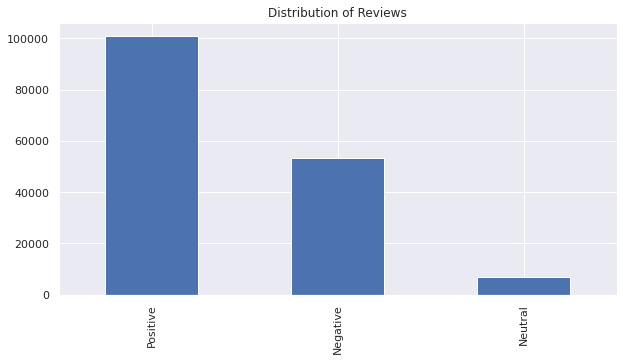

In [49]:
# How many reviews positive, negative or neutral?
dist_review = df['Sentiment Label'].value_counts()
print(dist_review)
plt.figure(figsize=(10, 5))
dist_review.plot(kind ='bar')
plt.title('Distribution of Reviews')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='Sentiment'>

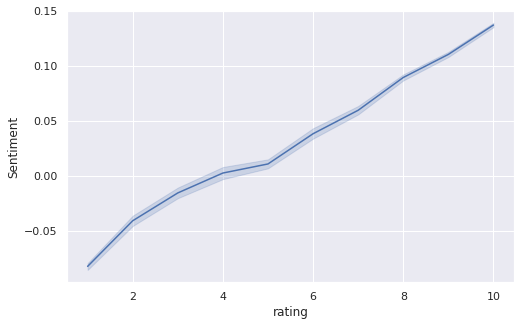

In [50]:
# Correlation between Sentiment and the ratings
plt.figure(figsize=(8,5))
sns.lineplot(data = df, x = 'rating', y = 'Sentiment')

### Conclusion
+ The Rating increases as the Sentiment polarity increases.

In [35]:
# How many ratings are genuine as per the reviews?
good_review = df[(df['rating'] >= 6) & (df['Sentiment Label'] == 'Positive')] 
bad_review = df[(df['rating'] >=6) & (df['Sentiment Label'] == 'Negative')]

In [36]:
# No. of good reviews
n_good = len(good_review.index)
n_good


81044

In [37]:
# No. of bad reviews
n_bad = len(bad_review.index)
n_bad

27807

## Analysis on Useful Count

drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Belviq           148
Alprazolam       146
Cymbalta         144
Venlafaxine      144
BuSpar           141
Name: usefulCount, dtype: int64


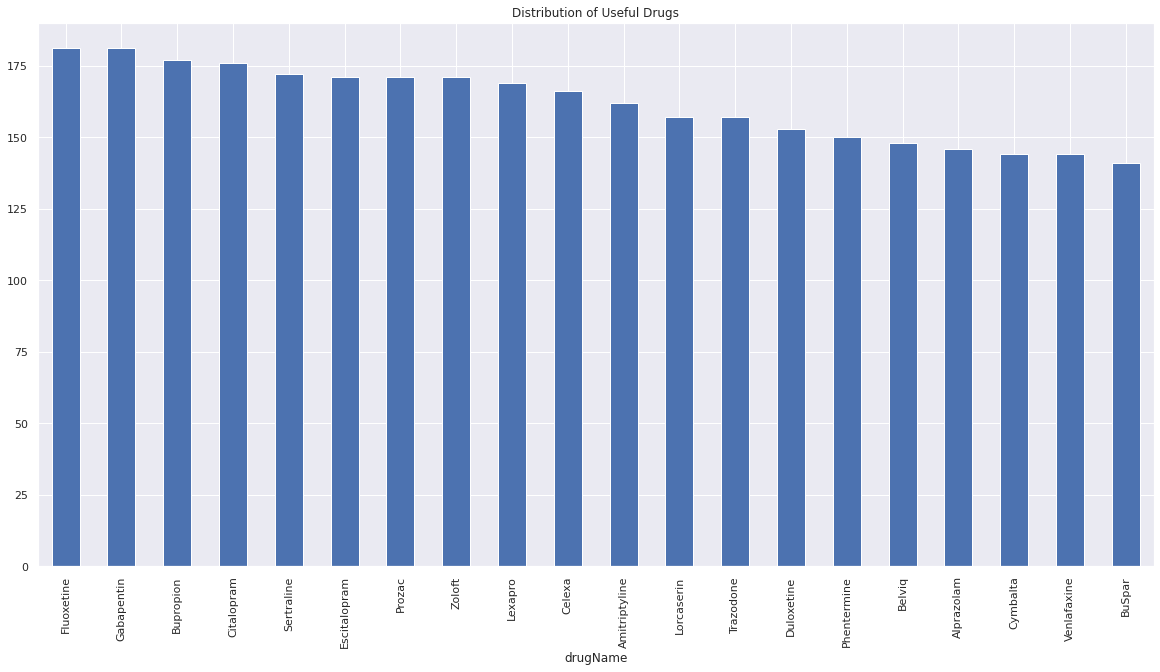

In [38]:
# Distribution of Drugs by useful count
dist_useful = df.groupby('drugName')['usefulCount'].nunique().nlargest(20)
print(dist_useful)
plt.figure(figsize=(20, 10))
dist_useful.plot(kind= 'bar')
plt.title('Distribution of Useful Drugs')
plt.show()

In [39]:
# Most useful Class of Drugs
useful_class = df.groupby('drugClass')['usefulCount'].nunique().nlargest(20)
useful_class

drugClass
opiod analgesics                           211
anti-anxiety                               198
oral hypoglycemics                         157
h2 blockers (anti-ulcers)                  147
phosphodiesterase (PDE) inhibitor          142
monoclonal antibody                        131
angiotensin II receptor antagonist; ARB    129
beta blocker                               127
antifungal (except metronidazole)          119
female hormone (progestin)                 116
ace inhibitor                              111
calcium channel blocker                    108
antibiotic; antibacterial                   97
quinolone antibiotic                        97
corticosteroid (prednisone)                 96
antipyschotics (phenothiazine)              95
NSAID                                       92
atypical antipsychotic                      88
corticosteroid                              87
proton pump inhibitor (PPI)                 87
Name: usefulCount, dtype: int64

Text(0.5, 1.0, 'Most useful Class of Drugs')

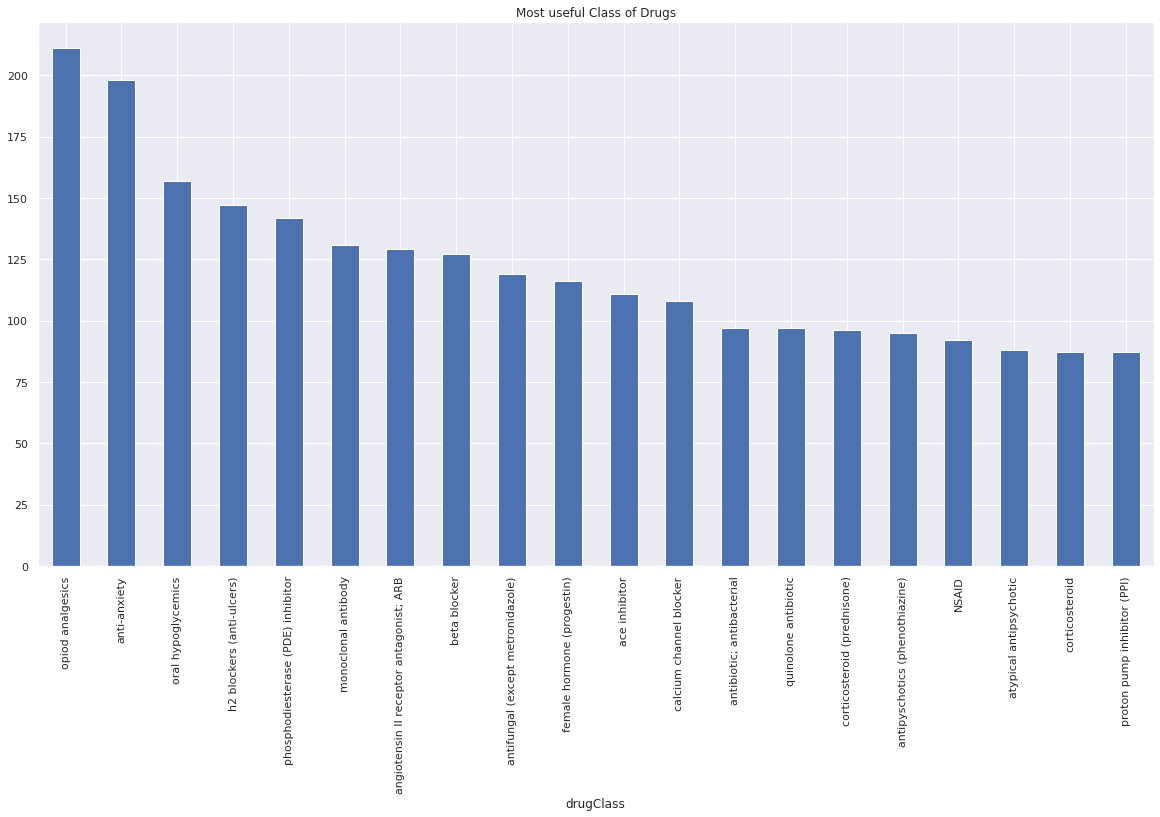

In [40]:
plt.figure(figsize=(20,10))
useful_class.plot(kind = 'bar')
plt.title('Most useful Class of Drugs')

In [41]:
# Least useful Class of Drugs
lst_usfl_class = df.groupby('drugClass')['usefulCount'].nunique().nsmallest(20)
lst_usfl_class

drugClass
alkylating agent (antineoplastic)                   4
antineoplastic; cytotoxic agent                     4
antibiotic                                          5
anticoagulants                                      5
xanthine derivative (bronchodilator)                8
retinoid; dermatologic agent; form of vitamin A    11
pituitary hormone                                  16
cephalosporin antibiotic                           20
barbiturate (sedative)                             21
antihistamine                                      22
antidiabetic; thiazolidinedione                    29
carbonic anhydrase inhibitor                       33
neuromuscular blocking agents                      37
anesthetic                                         47
antiemetic and antinauseant                        51
bisphosphonate; bone resorption inhibitor          53
antidiabetic; inhibitor of the DPP-4 enzyme        57
thrombolytics                                      59
antibiotic(penicil

Text(0.5, 1.0, 'Least useful Class of Drugs')

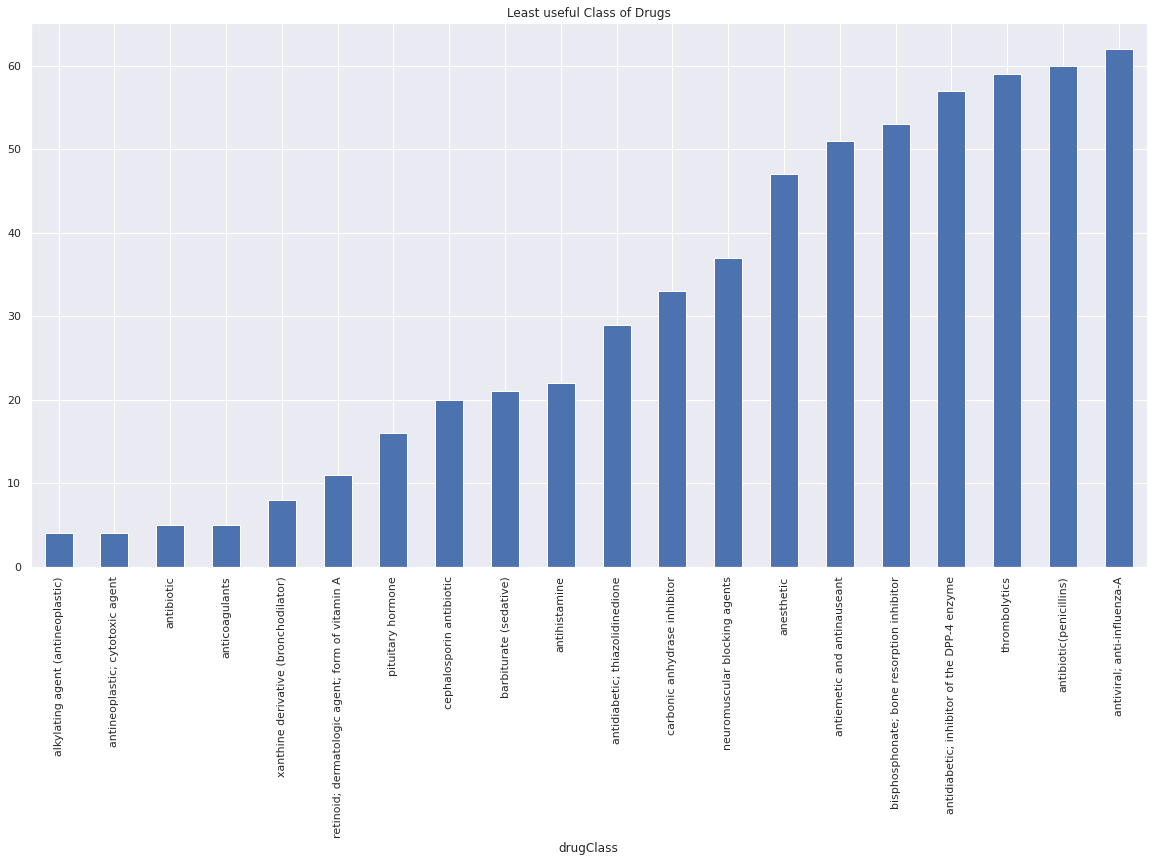

In [42]:
plt.figure(figsize=(20,10))
lst_usfl_class.plot(kind = 'bar')
plt.title('Least useful Class of Drugs')

<AxesSubplot:xlabel='rating', ylabel='usefulCount'>

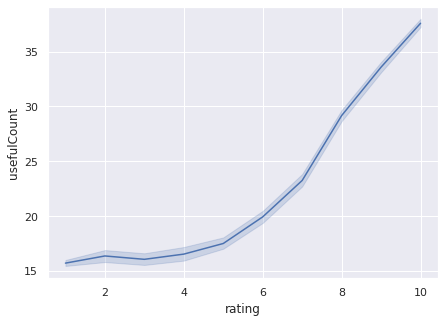

In [52]:
# Correlation between Useful count and ratings
plt.figure(figsize=(7,5))
sns.lineplot(data = df, x = 'rating', y = 'usefulCount')

### Conclusion
+ Thus the Useful Count and Rating are correlated to each other.